# ideas
- word count per doc
- word repetition
- phrase repition
- sentiment
- rhyme
- modeling of certain topics (eg love)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_genre = pd.read_csv("data/selected_genres.csv")
df_genre.head(1)

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,genre
0,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,Romântico


### Generate dataframe for each selected genre

In [3]:
# replace name of Romantico to avoid future problems
# Must be adjusted if there are any other special symbols, 
# a general processing function is likely not neccessary
df_genre["genre"] = df_genre.genre.str.replace("Romântico","Romantico")

In [4]:
genre_dict = {}
for genre in df_genre.genre.unique():
    genre_dict[genre] = df_genre.loc[df_genre.genre==genre]

In [5]:
print(f"Analysing the following genres:{df_genre.genre.unique()}")

Analysing the following genres:['Romantico' 'Rap' 'Gospel/Religioso' 'Country' 'Heavy Metal' 'Hardcore']


# Preprocess text
Some basic preprocessing
- TODO: expand this to remove more punctation and process phrases
  (e.g. I'm..) right now there are still some symbols left and counted as tokens...
- -> Punctuations Done

In [6]:
import nltk,string, re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')
extra_words_to_remove = ["i'm"]
def process_lyrics(df):
    tknzr = TweetTokenizer()
    lemmatizer = WordNetLemmatizer()
    stop_words = nltk.corpus.stopwords.words('english')
    punctuation = list(string.punctuation)
    remove = set(stop_words + punctuation + extra_words_to_remove)
    regex = "[-!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~”]"
    lyrics_tokenized = list(df.Lyric.apply(lambda x: [re.sub(regex, "", lemmatizer.lemmatize(i)) for i in tknzr.tokenize(x.lower()) if i not in remove]))
    return lyrics_tokenized



[nltk_data] Downloading package wordnet to
[nltk_data]     /home/thenextmz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/thenextmz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
processed_lyrics = {}

for genre in genre_dict:   
    df_genre = genre_dict[genre]
    print(f"Processing {genre}")
    pl = process_lyrics(df_genre)
    processed_lyrics[genre] = pl

Processing Romantico
Processing Rap
Processing Gospel/Religioso
Processing Country
Processing Heavy Metal
Processing Hardcore


In [8]:
# print(processed_lyrics["Rap"][0]) 

# Print data stats

In [9]:
for genre in genre_dict:
    n_songs =  len(processed_lyrics[genre])
    songs = processed_lyrics[genre]
    total_words = 0
    unique_words = 0
    for song in songs:
        unique_words+= len(np.unique(song))
        total_words+=len(song)
    avg_song_len = total_words/len(songs)
    avg_uq_words = unique_words/len(songs)
    print(f"Genre:{genre}")
    print(f"Number of songs:{n_songs}")
    print(f"Average number of words per song:{round(avg_song_len)}")
    print(f"Average number of UNIQUE words per song:{round(avg_uq_words)}")
    print(f"Unique words: {round(100*(avg_uq_words/avg_song_len))}%")
    print("------\n")

Genre:Romantico
Number of songs:16516
Average number of words per song:117
Average number of UNIQUE words per song:59
Unique words: 51%
------

Genre:Rap
Number of songs:16820
Average number of words per song:295
Average number of UNIQUE words per song:170
Unique words: 58%
------

Genre:Gospel/Religioso
Number of songs:5888
Average number of words per song:94
Average number of UNIQUE words per song:52
Unique words: 55%
------

Genre:Country
Number of songs:9749
Average number of words per song:107
Average number of UNIQUE words per song:61
Unique words: 57%
------

Genre:Heavy Metal
Number of songs:19562
Average number of words per song:106
Average number of UNIQUE words per song:61
Unique words: 58%
------

Genre:Hardcore
Number of songs:5002
Average number of words per song:96
Average number of UNIQUE words per song:54
Unique words: 56%
------



# Term frequencies and n-grams
- term frequency calculated with freqdist
- tf_per_genre = all terms of one genre ranked (independent of song)
- tf_per_genre_per_song = contains tf for each song
- TODO: get n-grams - sequences of words (eg. 4-grams "We will rock you"), could be nice to show how much repetion a song has

In [10]:
def tf(df,lyrics_tokenized,token_Freq):  
    song_names = list(df.SName.values)
    tf_per_song = {}
    
    for idx,val in enumerate(song_names):
        sname = song_names[idx]
        text = lyrics_tokenized[idx]
        token_freq.update(text)
        tf_per_song[sname]= nltk.FreqDist(text) 
    return tf_per_song

tf_per_genre = {}
tf_per_genre_per_song = {}

tf_genre_dict = {}
count = 0
for genre in processed_lyrics:
    token_freq = nltk.FreqDist()
    pl = processed_lyrics[genre]
    df = genre_dict[genre]
    print(f"Calculating tf for {genre}")
    tf_per_genre_per_song[genre] = tf(df,pl,token_freq)
    tf_per_genre[genre]= token_freq

Calculating tf for Romantico
Calculating tf for Rap
Calculating tf for Gospel/Religioso
Calculating tf for Country
Calculating tf for Heavy Metal
Calculating tf for Hardcore


In [11]:
def n_grams(df, lyrics_tokenized, window_size):
    song_names = list(df.SName.values)
    n_grams_per_song = {}
    for idx,val in enumerate(song_names):
        n_grams_arr = []
        # sname = song_names[idx]
        text = lyrics_tokenized[idx]
        for i, word in enumerate(text):
            """
            for j in range(1, window_size + 1):
                if(i - j >= 0):
                    n_grams_arr.append((word, text[i - j]))
            """
            for j in range(1, window_size + 1):
                if(i + j <= len(text) - 1):
                    n_grams_arr.append((word, text[i + j]))     
        n_grams_per_song[idx] = n_grams_arr
    return n_grams_per_song

n_gram_per_genre_per_song = {}
num = 1
for genre in processed_lyrics:
    pl = processed_lyrics[genre]
    df = genre_dict[genre]
    print(f"Calculating n_grams for {genre}")
    n_gram_per_genre_per_song[genre] = n_grams(df, pl, num)

Calculating n_grams for Romantico
Calculating n_grams for Rap
Calculating n_grams for Gospel/Religioso
Calculating n_grams for Country
Calculating n_grams for Heavy Metal
Calculating n_grams for Hardcore


In [12]:
# print(n_gram_per_genre_per_song["Rap"][0])

In [13]:
# print(len(unique_words))
# print(unique_words[0:10])

In [14]:
from collections import Counter
num_most = 10
def get_most_common_ngrams(n_grams_one_genre):
    all_n_grams_per_genre = []
    for idx in n_grams_one_genre:
        for n_gram in n_grams_one_genre[idx]:
              all_n_grams_per_genre.append(n_gram)
    return(Counter(all_n_grams_per_genre))       

most_common_per_genre = {}
for genre in n_gram_per_genre_per_song:
    most_common_per_genre[genre] = get_most_common_ngrams(n_gram_per_genre_per_song[genre])
    print(f"The {num_most} most common phrases for {genre} are:")
    print(most_common_per_genre[genre].most_common(num_most))
    print("----------------------")

The 10 most common phrases for Romantico are:
[(('oh', 'oh'), 5120), (('la', 'la'), 3378), (('love', 'love'), 3097), (('let', 'go'), 2957), (('yeah', 'yeah'), 2378), (('feel', 'like'), 1934), (('know', 'know'), 1721), (('ive', 'got'), 1567), (('na', 'na'), 1415), (('oh', 'yeah'), 1390)]
----------------------
The 10 most common phrases for Rap are:
[(('yeah', 'yeah'), 5867), (('oh', 'oh'), 3978), (('verse', '1'), 3227), (('verse', '2'), 3210), (('feel', 'like'), 2600), (('aint', 'got'), 2287), (('know', 'know'), 2194), (('get', 'get'), 2081), (('let', 'go'), 1903), (('verse', '3'), 1872)]
----------------------
The 10 most common phrases for Gospel/Religioso are:
[(('lyric', 'mercyme'), 992), (('oh', 'oh'), 932), (('let', 'go'), 799), (('holy', 'holy'), 574), (('love', 'love'), 531), (('la', 'la'), 528), (('feel', 'like'), 459), (('know', 'know'), 397), (('na', 'na'), 396), (('one', 'day'), 392)]
----------------------
The 10 most common phrases for Country are:
[(('bill', 'monroe'), 1

In [15]:
for genre in tf_per_genre:
    freq = tf_per_genre[genre]
    n = 10
    print(f"Top {n} terms for {genre}:")
    print(dict(freq.most_common(10)))
    print("----------------------")

Top 10 terms for Romantico:
{'love': 37251, 'know': 29692, 'like': 21826, 'oh': 21669, 'go': 16494, 'time': 16288, 'baby': 16115, 'one': 15316, 'never': 15287, 'got': 14129}
----------------------
Top 10 terms for Rap:
{'like': 78220, 'nigga': 61904, 'get': 60206, 'got': 56578, 'know': 50984, 'aint': 39171, 'yeah': 34767, 'go': 30552, 'shit': 30545, 'bitch': 30133}
----------------------
Top 10 terms for Gospel/Religioso:
{'love': 8750, 'know': 6583, '’': 6058, 'oh': 4762, 'like': 4595, 'life': 4551, 'god': 4494, 'lord': 4427, 'come': 4384, 'one': 4329}
----------------------
Top 10 terms for Country:
{'love': 14658, 'lyric': 12631, 'bill': 12024, 'monroe': 11760, 'know': 10524, 'like': 9234, 'time': 7952, 'got': 7403, 'go': 7226, 'one': 7207}
----------------------
Top 10 terms for Heavy Metal:
{'time': 16742, '': 16571, 'know': 16377, 'one': 15059, 'see': 14115, 'never': 13758, 'life': 13735, 'like': 13562, 'love': 12082, 'come': 12046}
----------------------
Top 10 terms for Hardcor

# Word Cloud
- TODO empty plots, run this again with savefig before show (?)

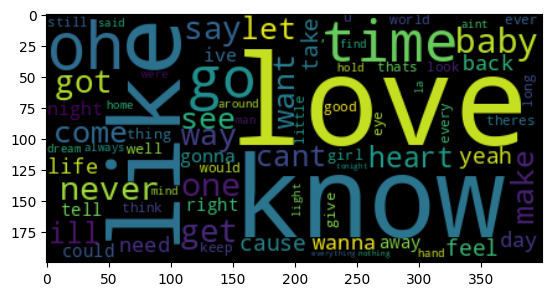

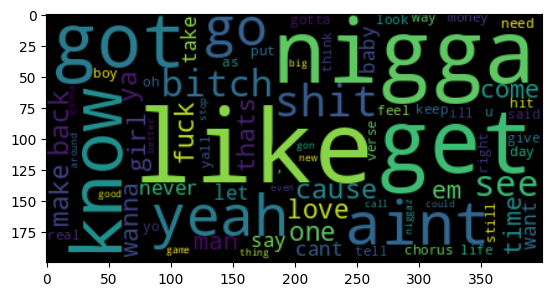

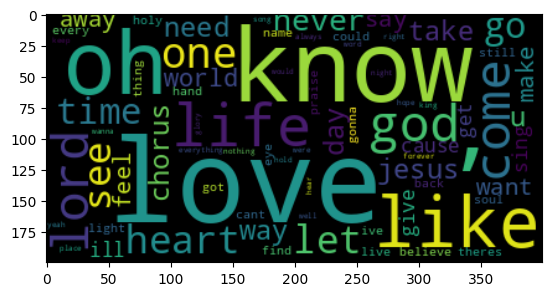

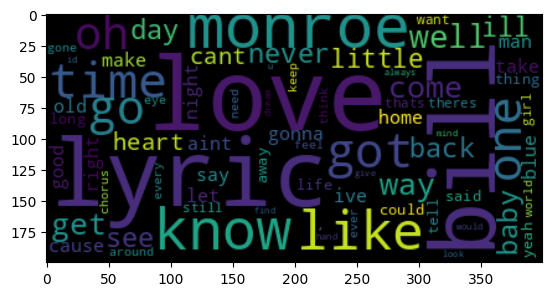

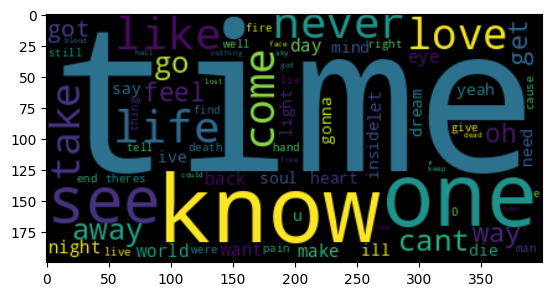

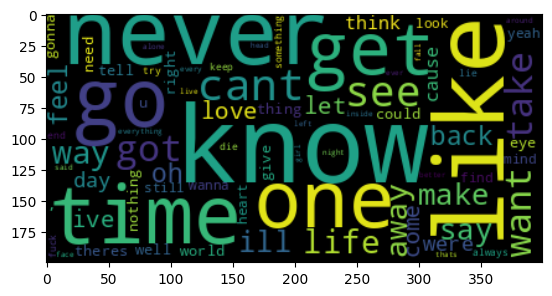

In [16]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

for genre in tf_per_genre:
    freq = tf_per_genre[genre]
    freq_dict = dict(freq.most_common(75))
    wordcloud = WordCloud().generate_from_frequencies(freq_dict)
    plt.imshow(wordcloud, interpolation="bilinear")    
    fname = genre
    if "/" in fname:
        fname = fname.replace("/","_")
    plt.savefig(f"plots/{fname}_wordcloud.png")
    plt.show()

# Sentiment of genres
- Basic implementation of sentiment analysis
- Sentences need to be split because else they will be too long for the model
- Splitting can be improved, preprocessing steps applied etc.
- For now only down on small amounts of data (because the model is really slow), should be plotted and compares

In [17]:

#!pip install -q transformers
from transformers import pipeline

model = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")


In [18]:
def get_sentiment(genre,n_songs=20):
    sentiment_scores = {
    "NEGATIVE":{"count":0,"score":0},
    #"NEU":{"count":0,"score":0},
    "POSITIVE":{"count":0,"score":0}
    }
    nr_sentences = 0
    songs = genre_dict[genre].Lyric.values[0:n_songs]
    for song in songs:
        sentences = song.split("\n")
        #sentences = song
        nr_sentences+=len(sentences)
        sent = model(sentences)    
        for s in sent:
            label = s["label"]
            score =s["score"]
            sentiment_scores[label]["count"]+=1
            sentiment_scores[label]["score"]+=score
    for label in sentiment_scores:
        if sentiment_scores[label]["count"]!=0:
            sentiment_scores[label]["score"]/=sentiment_scores[label]["count"]
            sentiment_scores[label]["count"]/=nr_sentences
    return sentiment_scores

sentiment_dict = {}
for genre in genre_dict:
    print(f"getting sentiment for genre:{genre}")
    sentiment_dict[genre]= get_sentiment(genre,20)       

getting sentiment for genre:Romantico
getting sentiment for genre:Rap
getting sentiment for genre:Gospel/Religioso
getting sentiment for genre:Country
getting sentiment for genre:Heavy Metal
getting sentiment for genre:Hardcore


### plotting

In [19]:
vals= []
labels_genre = []
pos = []
neg = []
for genre in sentiment_dict:
    senti = sentiment_dict[genre]
    labels_genre.append(genre)
    labels_senti= ["POSITIVE","NEGATIVE"]
    vals.append([senti["POSITIVE"]["count"],senti["NEGATIVE"]["count"]])
    pos.append(senti["POSITIVE"]["count"])
    neg.append(senti["NEGATIVE"]["count"])

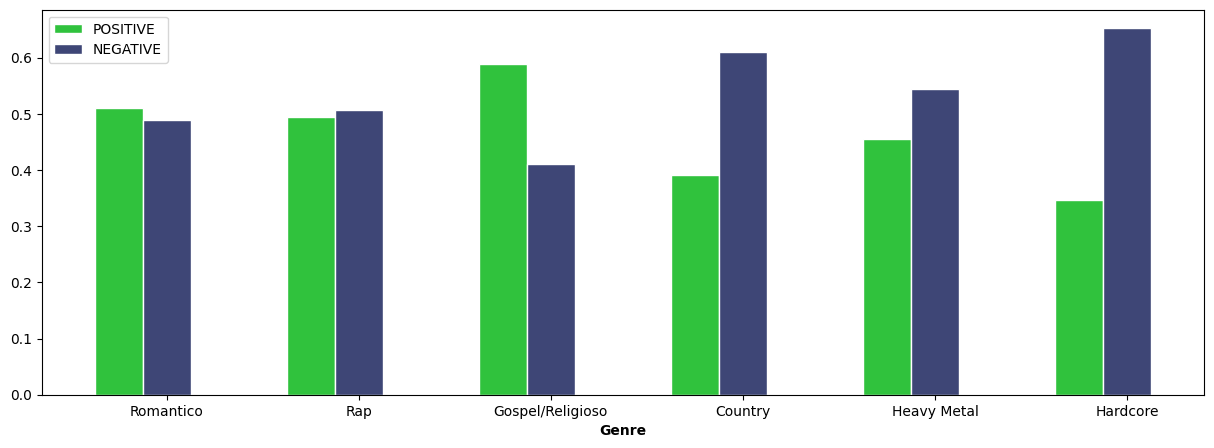

<Figure size 640x480 with 0 Axes>

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars

# Set position of bar on X axis
r1 = np.arange(len(pos))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.figure(figsize=(15, 5))
plt.bar(r1, pos, color='#30C23D', width=barWidth, edgecolor='white', label='POSITIVE')
plt.bar(r2, neg, color='#3E4676', width=barWidth, edgecolor='white', label='NEGATIVE')

# Add xticks on the middle of the group bars
plt.xlabel('Genre', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(labels_genre))], labels_genre)
 
# Create legend & Show graphic
plt.legend()
plt.show()
plt.savefig("plots/sentiment.png")

In [21]:
sentiment_dict["Romantico"]

{'NEGATIVE': {'count': 0.48940269749518306, 'score': 0.9700152746101064},
 'POSITIVE': {'count': 0.5105973025048169, 'score': 0.9925678232930741}}

In [22]:
genre_dict["Romantico"].Lyric.values[0]

"I feel so unsure\nAs I take your hand and lead you to the dance floor\nAs the music dies, something in your eyes\nCalls to mind a silver screen\nAnd all those sad goodbyes\n\nI'm never gonna dance again\nGuilty feet have got no rhythm\nThough it's easy to pretend\nI know you're not a fool\n\nShould've known better than to cheat a friend\nAnd waste the chance that I've been given\nSo I'm never gonna dance again\nThe way I danced with you\n\nTime can never mend\nThe careless whispers of a good friend\nTo the heart and mind\nIgnorance is kind\nThere's no comfort in the truth\nPain is all you'll find\n\nI'm never gonna dance again\nGuilty feet have got no rhythm\nThough it's easy to pretend\nI know you're not a fool\n\nShould've known better than to cheat a friend\nAnd waste this chance that I've been given\nSo I'm never gonna dance again\nThe way I danced with you\n\nNever without your love\n\nTonight the music seems so loud\nI wish that we could lose this crowd\nMaybe it's better this w

# Rhyme

# Clustering
- TODO: Cluster songs too see overlap (eg are hardcore and rock closer together than hardcore and Romantico etc.)
- probably needs more preprocessing too (either embeddings, onehot encoding of words, stop word removal etc.)

In [23]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
for genre in processed_lyrics:
    df = genre_dict[genre].head(20)[["genre","Lyric"]]
    text = df.Lyric.values
#text = genre_dict["Romantico"].Lyric.values[:20]
vec = TfidfVectorizer()
vec.fit(text)
features = vec.transform(text)
clust = KMeans(init="k-means++",n_clusters=5,n_init=10)
clust.fit(features)

KMeans(n_clusters=5)

In [24]:
clust.predict(features)

array([4, 2, 4, 0, 0, 3, 1, 3, 2, 4, 1, 1, 3, 0, 3, 4, 0, 0, 3, 4],
      dtype=int32)